In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

In [2]:
fraud_check=pd.read_csv("D:/Assignments Excel R/assignment 15/Fraud_Check.csv")

In [3]:
fraud_check.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


 ## Exploratory Data Analysis

In [4]:
fraud_check_df=fraud_check.copy()

In [5]:
fraud_check_df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [6]:
#Data Structure
fraud_check_df.shape

(600, 6)

In [7]:
fraud_check_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [8]:
# Duplicate
fraud_check_df[fraud_check_df.duplicated()].shape

(0, 6)

<AxesSubplot:>

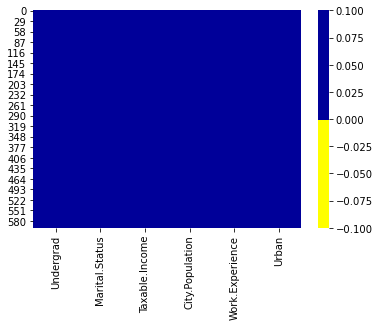

In [9]:
# Missing values and Imputation
cols=fraud_check_df.columns
colours=['#ffff00','#000099']
sns.heatmap(fraud_check_df[cols].isnull(),
           cmap=sns.color_palette(colours))


In [10]:
fraud_check_df.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [11]:
fraud_check_df=fraud_check_df.rename({'Marital.Status':'Marital','City.Population':'Population','Work.Experience':'Experience'}, axis=1)

In [12]:
fraud_check_df.head()

,Undergrad,Marital,Taxable.Income,Population,Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


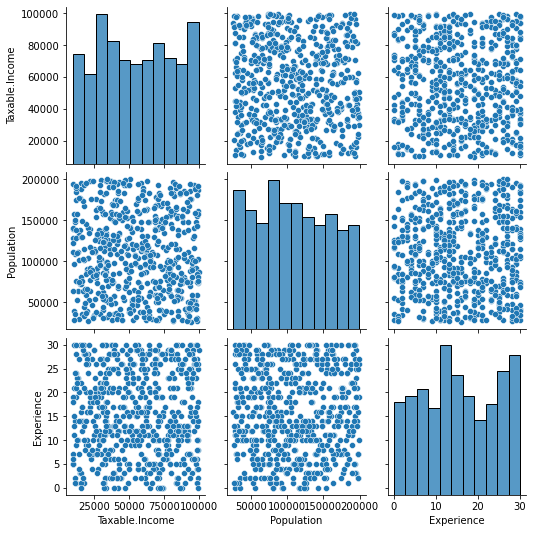

In [13]:
# Scatter plot and Correlation Analysis
sns.pairplot(fraud_check_df)

In [14]:
fraud_check_df.corr()

,Taxable.Income,Population,Experience
Taxable.Income,1.000000,-0.064387,-0.001818
Population,-0.064387,1.000000,0.013135
Experience,-0.001818,0.013135,1.000000


In [15]:
import sweetviz as sv
sweet_report=sv.analyze(fraud_check_df)
sweet_report.show_html("Random Forest_Fraud_Check_EDA_Report.html")


Report Random Forest_Fraud_Check_EDA_Report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


 ## LabelEncoder

In [17]:
labelencoder=LabelEncoder
cols=['Undergrad','Marital','Urban']
fraud_check_df[cols]=fraud_check_df[cols].apply(LabelEncoder().fit_transform)
fraud_check_df.head()

,Undergrad,Marital,Taxable.Income,Population,Experience,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0


 ### Converting the Taxable Income variable to bucketing

In [18]:
fraud_check_df["Income"]="<=30000"
fraud_check_df.loc[fraud_check_df["Taxable.Income"]>=30000,"Income"]="1" # Good =1
fraud_check_df.loc[fraud_check_df["Taxable.Income"]<=30000,"Income"]="0" # Risky=0

In [19]:
fraud_check_df.head()

,Undergrad,Marital,Taxable.Income,Population,Experience,Urban,Income
0,0,2,68833,50047,10,1,1
1,1,0,33700,134075,18,1,1
2,0,1,36925,160205,30,1,1
3,1,2,50190,193264,15,1,1
4,0,1,81002,27533,28,0,1


In [20]:
fraud_check_df1=fraud_check_df.drop('Taxable.Income', axis=1)

In [21]:
fraud_check_df1.head()

,Undergrad,Marital,Population,Experience,Urban,Income
0,0,2,50047,10,1,1
1,1,0,134075,18,1,1
2,0,1,160205,30,1,1
3,1,2,193264,15,1,1
4,0,1,27533,28,0,1


In [22]:
fraud_check_df1=fraud_check_df1.astype({"Income":'int'})

 ## Normalization Funca]tion

In [23]:
def norm_func(i):
    x=(i-i.min())/(i.max()-i.min())
    return(x)

In [24]:
fraud_check_df1=norm_func(fraud_check_df1.iloc[:,0:])

In [26]:
fraud_check_df1=fraud_check_df1.astype({"Undergrad":'int',"Marital":'int',"Urban":'int',"Income":'int'})

In [27]:
fraud_check_df1.head()

,Undergrad,Marital,Population,Experience,Urban,Income
0,0,1,0.139472,0.333333,1,1
1,1,0,0.622394,0.600000,1,1
2,0,0,0.772568,1.000000,1,1
3,1,1,0.962563,0.500000,1,1
4,0,0,0.010081,0.933333,0,1


 ## Randome Forest Classification

In [29]:
X=fraud_check_df.iloc[:,0:5]
Y=fraud_check_df['Income']

num_tree=100
max_features=3
kfold=KFold(n_splits=10, random_state=7, shuffle=True)
model=RandomForestClassifier(n_estimators=num_tree, max_features=max_features)
results=cross_val_score(model, X,Y, cv=kfold)

In [30]:
results

array([1.        , 1.        , 1.        , 1.        , 1.        ,
       0.98333333, 1.        , 1.        , 1.        , 1.        ])

In [31]:
print(results.mean())

0.9983333333333334


 ## Splitting data into Training and Testing Dataset

In [32]:
x_train, x_test, y_train,y_test=train_test_split(X,Y, test_size=0.20, random_state=40)

In [33]:
model=RandomForestClassifier()
model.fit(x_train, y_train)

RandomForestClassifier()

In [34]:
pred=model.predict(x_test)
pd.Series(pred).value_counts()

1    93
0    27
dtype: int64

 ## Confusion Matrix

In [35]:
cm=pd.crosstab(y_test, pred)

In [37]:
cm

col_0,0,1
Income,,
0,27,1
1,0,92


 ## Interpretation 
     
 ###  As per my analysis 99% people having  taxable Income is >30000, we are considering this model is Good.